## Simulating at higher temperatures and setting $Q_{10}$ values

In [45]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
import pandas as pd

pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 2000)
pd.set_option("display.float_format", "{:,.4f}".format)

In [47]:
from pyloric import create_prior, simulate, stats
from pyloric.utils import show_traces
import torch

### Create prior with default $Q_{10}$ values

In [48]:
prior = create_prior(customization={})
_ = torch.manual_seed(2)
p = prior.sample((1,))
p

AB/PD                                                      LP                                                      PY                                                  Synapses                                                     
      Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak    AB-LP    PD-LP   AB-PY    PD-PY    LP-PD    LP-PY    PY-LP
0 0.2881 0.0005 0.0036 0.0204 0.0086 0.0570 0.0000 0.0000 0.0870 0.0007 0.0018 0.0277 0.0039 0.0634 0.0000 0.0000 0.3547 0.0015 0.0019 0.0210 0.0023 0.0758 0.0000 0.0000 -12.5681 -16.8734 -8.3747 -18.1356 -16.2665 -13.3063 -18.0895

### Simulate at 10 degree and at 26 degree

In [49]:
simulation_output = [simulate(p.loc[0], temperature=temp, seed=0) for temp in [283, 299]]

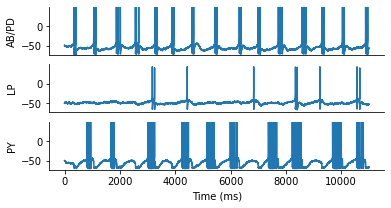

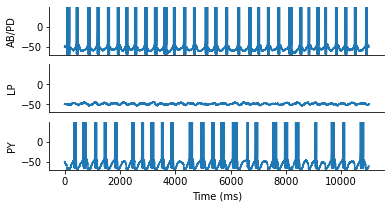

In [50]:
for sim_ in simulation_output:
    _ = show_traces(sim_)

### Using variable $Q_{10}$ values

In [56]:
customization = {
    "Q10_gbar_mem": [True, True, True, True, True, True, True, True],
    "Q10_gbar_syn": [True, True]
}

prior = create_prior(customization=customization)
_ = torch.manual_seed(2)
p = prior.sample((1,))
p

AB/PD                                                      LP                                                      PY                                                  Synapses                                                      Q10 gbar                                                               
      Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak     Na    CaT    CaS      A    KCa     Kd      H   Leak    AB-LP    PD-LP   AB-PY    PD-PY    LP-PD    LP-PY    PY-LP       Na    CaT    CaS      A    KCa     Kd      H   Leak   Glut   Chol
0 0.2881 0.0005 0.0036 0.0204 0.0086 0.0570 0.0000 0.0000 0.0870 0.0007 0.0018 0.0277 0.0039 0.0634 0.0000 0.0000 0.3547 0.0015 0.0019 0.0210 0.0023 0.0758 0.0000 0.0000 -12.5681 -16.8734 -8.3747 -18.1356 -16.2665 -13.3063 -18.0895   1.1701 1.5530 1.3270 1.7248 1.3561 1.3695 1.8486 1.3875 1.1408 1.4006

### Simulate them at 10 and 26 degree
The trace at 10 degree is identical because it is the reference temperature at which $Q_{10}$ values do not play a role. The activity is slightly different at 26 degree though.

In [57]:
simulation_output = [simulate(p.loc[0], temperature=temp, customization=customization, seed=0) for temp in [283, 299]]

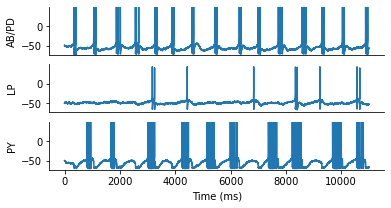

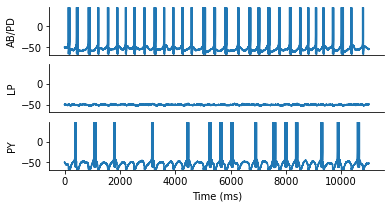

In [58]:
for sim_ in simulation_output:
    _ = show_traces(sim_)